In [47]:
# Libraries
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

# Seeds
np.random.seed(42)
tf.random.set_seed(42)

# Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)
project_root_dir = '/content/drive/My Drive/CS_229_project/'

In [ ]:
img_dir = os.path.join(project_root_dir, 'img_data')
aqi_dir = os.path.join(project_root_dir, 'aqi_data', 'final_data')
experiments_dir = os.path.join(project_root_dir, 'experiments')

## Create final df from scratch

In [ ]:
import glob
all_images = glob.glob(os.path.join(img_dir, 'county_site', '*.jpg'))
all_images = [os.path.basename(img) for img in all_images]

In [ ]:
len(all_images)

7605

In [ ]:
image_data = pd.read_csv(os.path.join(img_dir, 'file_to_site_mapping.csv'))

In [ ]:
image_data

,id,file,site,strip_id,cloud_cover,full_site,src_directory
0,59_5001,20190405_185026_37_106c,5001.0,2260937.0,0.18,60595001,county_site
1,59_5001,20181014_180625_1014,5001.0,1767245.0,0.87,60595001,county_site
2,59_5001,20190902_184228_93_1067,5001.0,2646834.0,0.18,60595001,county_site
3,59_5001,20181007_180623_1005,5001.0,1751570.0,0.19,60595001,county_site
4,59_5001,20200517_182913_87_1067,5001.0,3405714.0,0.12,60595001,county_site
...,...,...,...,...,...,...,...
7197,83_4003,20170615_175821_1010,NaN,NaN,0.30,60834003,county_site
7198,83_4003,20190516_185741_85_106e,NaN,NaN,0.30,60834003,county_site
7199,83_4003,20191102_181448_0e20,NaN,NaN,0.30,60834003,county_site
7200,83_4003,20200430_210627_0f02,NaN,NaN,0.30,60834003,county_site


In [ ]:
image_data['id'] = image_data['id'].astype(str)

In [ ]:
image_data['full_file'] = image_data['id'] + '_' + image_data['file'] + '_3B_Visual_clip.jpg'

## Merge to AQI data

In [ ]:
image_data = image_data.rename(columns = {'full_file': 'filenames', 'full_site': 'Site_ID'})

In [ ]:
site_data = pd.read_csv(os.path.join(aqi_dir, 'all_sites_data.csv'))
site_data['Date'] = pd.to_datetime(site_data['Date'])
site_data['Site_ID'] = site_data['Site_ID'].astype(str)

In [ ]:
site_data[site_data.Site_ID == '60834003']

,Date,Site_ID,ozone_AQI,pm2.5_AQI,AQI,class,pm2.5_class,AQI_class,pm2.5_AQI_class
172,2016-01-01,60834003,39.0,0.0,39.0,0,NaN,Good,NaN
358,2016-01-02,60834003,42.0,0.0,42.0,0,NaN,Good,NaN
543,2016-01-03,60834003,44.0,0.0,44.0,0,NaN,Good,NaN
741,2016-01-04,60834003,40.0,0.0,40.0,0,NaN,Good,NaN
925,2016-01-05,60834003,39.0,0.0,39.0,0,NaN,Good,NaN
...,...,...,...,...,...,...,...,...,...
214027,2018-12-26,60834003,30.0,0.0,30.0,0,NaN,Good,NaN
214211,2018-12-27,60834003,31.0,0.0,31.0,0,NaN,Good,NaN
214409,2018-12-28,60834003,32.0,0.0,32.0,0,NaN,Good,NaN
214596,2018-12-29,60834003,37.0,0.0,37.0,0,NaN,Good,NaN


In [ ]:
image_data['Date'] = [pd.to_datetime(file_name[0:8]) for file_name in image_data["file"]]
image_data['Site_ID'] = image_data['Site_ID'].astype(str)

In [ ]:
label_file = pd.merge(image_data, site_data, how = 'inner', on = ['Date', 'Site_ID'])
label_file

,id,file,site,strip_id,cloud_cover,Site_ID,src_directory,filenames,Date,ozone_AQI,pm2.5_AQI,AQI,class,pm2.5_class,AQI_class,pm2.5_AQI_class
0,59_5001,20181014_180625_1014,5001.0,1767245.0,0.87,60595001,county_site,59_5001_20181014_180625_1014_3B_Visual_clip.jpg,2018-10-14,33.0,0.0,33.0,0,NaN,Good,NaN
1,59_5001,20190902_184228_93_1067,5001.0,2646834.0,0.18,60595001,county_site,59_5001_20190902_184228_93_1067_3B_Visual_clip...,2019-09-02,37.0,0.0,37.0,0,NaN,Good,NaN
2,59_5001,20181007_180623_1005,5001.0,1751570.0,0.19,60595001,county_site,59_5001_20181007_180623_1005_3B_Visual_clip.jpg,2018-10-07,42.0,0.0,42.0,0,NaN,Good,NaN
3,59_5001,20200517_182913_87_1067,5001.0,3405714.0,0.12,60595001,county_site,59_5001_20200517_182913_87_1067_3B_Visual_clip...,2020-05-17,40.0,0.0,40.0,0,NaN,Good,NaN
4,59_5001,20180406_180052_0f1b,5001.0,1332476.0,0.15,60595001,county_site,59_5001_20180406_180052_0f1b_3B_Visual_clip.jpg,2018-04-06,43.0,0.0,43.0,0,NaN,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,83_4003,20170706_175934_101e,NaN,NaN,0.30,60834003,county_site,83_4003_20170706_175934_101e_3B_Visual_clip.jpg,2017-07-06,31.0,0.0,31.0,0,NaN,Good,NaN
6091,83_4003,20181211_182020_0f15,NaN,NaN,0.30,60834003,county_site,83_4003_20181211_182020_0f15_3B_Visual_clip.jpg,2018-12-11,31.0,0.0,31.0,0,NaN,Good,NaN
6092,83_4003,20171217_180715_0f42,NaN,NaN,0.30,60834003,county_site,83_4003_20171217_180715_0f42_3B_Visual_clip.jpg,2017-12-17,41.0,0.0,41.0,0,NaN,Good,NaN
6093,83_4003,20171206_180702_101d,NaN,NaN,0.30,60834003,county_site,83_4003_20171206_180702_101d_3B_Visual_clip.jpg,2017-12-06,44.0,0.0,44.0,0,NaN,Good,NaN


In [ ]:
import collections
collections.Counter(label_file['AQI_class'])

Counter({'Good': 3486,
         'Moderate': 1757,
         'Unhealthy': 189,
         'Unhealthy for sensitive groups': 616,
         'Very unhealthy': 47})

In [ ]:
label_file[label_file["filenames"].isin(all_images)]

,id,file,site,strip_id,cloud_cover,Site_ID,src_directory,filenames,Date,ozone_AQI,pm2.5_AQI,AQI,class,pm2.5_class,AQI_class,pm2.5_AQI_class
0,59_5001,20181014_180625_1014,5001.0,1767245.0,0.87,60595001,county_site,59_5001_20181014_180625_1014_3B_Visual_clip.jpg,2018-10-14,33.0,0.0,33.0,0,NaN,Good,NaN
1,59_5001,20190902_184228_93_1067,5001.0,2646834.0,0.18,60595001,county_site,59_5001_20190902_184228_93_1067_3B_Visual_clip...,2019-09-02,37.0,0.0,37.0,0,NaN,Good,NaN
2,59_5001,20181007_180623_1005,5001.0,1751570.0,0.19,60595001,county_site,59_5001_20181007_180623_1005_3B_Visual_clip.jpg,2018-10-07,42.0,0.0,42.0,0,NaN,Good,NaN
3,59_5001,20200517_182913_87_1067,5001.0,3405714.0,0.12,60595001,county_site,59_5001_20200517_182913_87_1067_3B_Visual_clip...,2020-05-17,40.0,0.0,40.0,0,NaN,Good,NaN
4,59_5001,20180406_180052_0f1b,5001.0,1332476.0,0.15,60595001,county_site,59_5001_20180406_180052_0f1b_3B_Visual_clip.jpg,2018-04-06,43.0,0.0,43.0,0,NaN,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,83_4003,20170706_175934_101e,NaN,NaN,0.30,60834003,county_site,83_4003_20170706_175934_101e_3B_Visual_clip.jpg,2017-07-06,31.0,0.0,31.0,0,NaN,Good,NaN
6091,83_4003,20181211_182020_0f15,NaN,NaN,0.30,60834003,county_site,83_4003_20181211_182020_0f15_3B_Visual_clip.jpg,2018-12-11,31.0,0.0,31.0,0,NaN,Good,NaN
6092,83_4003,20171217_180715_0f42,NaN,NaN,0.30,60834003,county_site,83_4003_20171217_180715_0f42_3B_Visual_clip.jpg,2017-12-17,41.0,0.0,41.0,0,NaN,Good,NaN
6093,83_4003,20171206_180702_101d,NaN,NaN,0.30,60834003,county_site,83_4003_20171206_180702_101d_3B_Visual_clip.jpg,2017-12-06,44.0,0.0,44.0,0,NaN,Good,NaN


In [ ]:
# 0.3 cloud cover cutoff

label_file = label_file[label_file["cloud_cover"] <= 0.3]

In [ ]:
label_file[label_file["cloud_cover"] == 0.3]

,id,file,site,strip_id,cloud_cover,Site_ID,src_directory,filenames,Date,ozone_AQI,pm2.5_AQI,AQI,class,pm2.5_class,AQI_class,pm2.5_AQI_class
27,37_1302,20191208_183831_01_1067,1302.0,2915904.0,0.3,60371302,county_site,37_1302_20191208_183831_01_1067_3B_Visual_clip...,2019-12-08,31.0,27.0,31.0,0,0.0,Good,Good
37,37_1302,20190415_181234_0f12,1302.0,2287710.0,0.3,60371302,county_site,37_1302_20190415_181234_0f12_3B_Visual_clip.jpg,2019-04-15,35.0,36.0,36.0,0,0.0,Good,Good
47,37_1302,20201001_182130_77_106b,NaN,NaN,0.3,60371302,county_site,37_1302_20201001_182130_77_106b_3B_Visual_clip...,2020-10-01,58.0,0.0,58.0,1,NaN,Moderate,NaN
58,37_1302,20181104_180755_1035,1302.0,1817639.0,0.3,60371302,county_site,37_1302_20181104_180755_1035_3B_Visual_clip.jpg,2018-11-04,54.0,74.0,74.0,1,1.0,Moderate,Moderate
109,71_12,20201006_181333_1004,NaN,NaN,0.3,60710012,county_site,71_12_20201006_181333_1004_3B_Visual_clip.jpg,2020-10-06,122.0,0.0,122.0,2,NaN,Unhealthy for sensitive groups,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,83_4003,20170706_175934_101e,NaN,NaN,0.3,60834003,county_site,83_4003_20170706_175934_101e_3B_Visual_clip.jpg,2017-07-06,31.0,0.0,31.0,0,NaN,Good,NaN
6091,83_4003,20181211_182020_0f15,NaN,NaN,0.3,60834003,county_site,83_4003_20181211_182020_0f15_3B_Visual_clip.jpg,2018-12-11,31.0,0.0,31.0,0,NaN,Good,NaN
6092,83_4003,20171217_180715_0f42,NaN,NaN,0.3,60834003,county_site,83_4003_20171217_180715_0f42_3B_Visual_clip.jpg,2017-12-17,41.0,0.0,41.0,0,NaN,Good,NaN
6093,83_4003,20171206_180702_101d,NaN,NaN,0.3,60834003,county_site,83_4003_20171206_180702_101d_3B_Visual_clip.jpg,2017-12-06,44.0,0.0,44.0,0,NaN,Good,NaN


## Correct for rotated images by site

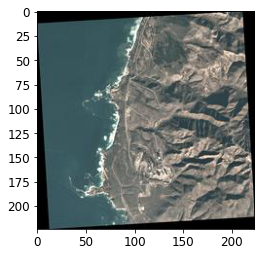

In [ ]:
idx = 6093
img_file = os.path.join(img_dir, 'county_site', label_file["filenames"][idx])
img = keras.preprocessing.image.load_img(img_file)
plt.imshow(img)

In [ ]:
img = img.rotate(-3.125).crop((8, 8, 223-8, 223-8)).resize((224, 224))

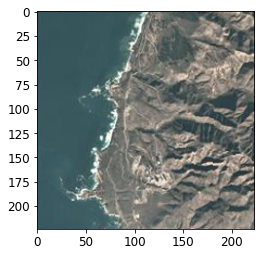

In [ ]:
plt.imshow(img)

In [ ]:
img.save(os.path.join(project_root_dir, 'sample_rotated_img.jpg'), format = 'jpeg')

In [ ]:
from tqdm import tqdm

rotated_sites = ['83_2004', '83_1013', '83_1025', '83_9000', '83_1018', '83_4003']

df = label_file[label_file["id"].isin(rotated_sites)]
n_rotated = 0

for idx in tqdm(df.index):
  file_name = df["filenames"][idx]
  img = keras.preprocessing.image.load_img(os.path.join(img_dir, 'county_site', file_name))
  img = keras.preprocessing.image.img_to_array(img)
  thresh = 5
  flag = (img[0, 0] < thresh) + (img[223, 0] < thresh) + (img[0, 223] < thresh) + (img[223, 223] < thresh)
  flag = np.all(flag)
  if flag:
    new_filename = df['id'][idx] + '_' + df['file'][idx] + '_3B_Visual_clip_rotated.jpg'
    df["filenames"][idx] = new_filename
    df["src_directory"][idx] = 'rotation_fixed'
    img = keras.preprocessing.image.array_to_img(img)
    img = img.rotate(-3.125).crop((8, 8, 223-8, 223-8)).resize((224, 224))
    img.save(os.path.join(img_dir, 'rotation_fixed', new_filename), format = 'jpeg')
    n_rotated += 1

  0%|          | 0/436 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|███

In [ ]:
n_rotated

403

In [ ]:
df

,id,file,site,strip_id,cloud_cover,Site_ID,src_directory,filenames,Date,ozone_AQI,pm2.5_AQI,AQI,class,pm2.5_class,AQI_class,pm2.5_AQI_class
2838,83_2004,20190630_211257_0f02,NaN,NaN,0.3,60832004,rotation_fixed,83_2004_20190630_211257_0f02_3B_Visual_clip_ro...,2019-06-30,15.0,28.0,28.0,0,0.0,Good,Good
2839,83_2004,20200122_184505_26_1059,NaN,NaN,0.3,60832004,rotation_fixed,83_2004_20200122_184505_26_1059_3B_Visual_clip...,2020-01-22,11.0,5.0,11.0,0,0.0,Good,Good
2840,83_2004,20200927_183042_47_1067,NaN,NaN,0.3,60832004,rotation_fixed,83_2004_20200927_183042_47_1067_3B_Visual_clip...,2020-09-27,19.0,32.0,32.0,0,0.0,Good,Good
2841,83_2004,20200523_185344_40_1057,NaN,NaN,0.3,60832004,rotation_fixed,83_2004_20200523_185344_40_1057_3B_Visual_clip...,2020-05-23,16.0,48.0,48.0,0,0.0,Good,Good
2842,83_2004,20200527_182348_1009,NaN,NaN,0.3,60832004,rotation_fixed,83_2004_20200527_182348_1009_3B_Visual_clip_ro...,2020-05-27,14.0,20.0,20.0,0,0.0,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,83_4003,20170706_175934_101e,NaN,NaN,0.3,60834003,rotation_fixed,83_4003_20170706_175934_101e_3B_Visual_clip_ro...,2017-07-06,31.0,0.0,31.0,0,NaN,Good,NaN
6091,83_4003,20181211_182020_0f15,NaN,NaN,0.3,60834003,rotation_fixed,83_4003_20181211_182020_0f15_3B_Visual_clip_ro...,2018-12-11,31.0,0.0,31.0,0,NaN,Good,NaN
6092,83_4003,20171217_180715_0f42,NaN,NaN,0.3,60834003,rotation_fixed,83_4003_20171217_180715_0f42_3B_Visual_clip_ro...,2017-12-17,41.0,0.0,41.0,0,NaN,Good,NaN
6093,83_4003,20171206_180702_101d,NaN,NaN,0.3,60834003,rotation_fixed,83_4003_20171206_180702_101d_3B_Visual_clip_ro...,2017-12-06,44.0,0.0,44.0,0,NaN,Good,NaN


In [ ]:
label_file[label_file["id"].isin(rotated_sites)] = df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
collections.Counter(label_file.src_directory)

Counter({'county_site': 5152, 'rotation_fixed': 403})

In [ ]:
label_file.to_csv(os.path.join(aqi_dir, 'label_file.csv'), index = False)

## Start here after rotating

In [ ]:
label_file.loc[label_file["class"] >= 2, "class"] = 2
label_file.loc[label_file["pm2.5_class"] >= 2, "pm2.5_class"] = 2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
label_file.loc[label_file["AQI_class"].isin(["Unhealthy", "Unhealthy for sensitive groups", "Very unhealthy"]), "AQI_class"] = "Unhealthy"
label_file.loc[label_file["pm2.5_AQI_class"].isin(["Unhealthy", "Unhealthy for sensitive groups", "Very unhealthy"]), "pm2.5_AQI_class"] = "Unhealthy"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
collections.Counter(label_file["AQI_class"])

Counter({'Good': 3076, 'Moderate': 1644, 'Unhealthy': 835})

In [ ]:
collections.Counter(label_file['pm2.5_AQI_class'])

Counter({'Good': 2298, 'Moderate': 800, 'Unhealthy': 26, nan: 2431})

In [ ]:
label_file.to_csv(os.path.join(aqi_dir, 'label_file.csv'), index = False)

## Organize files into directories

In [ ]:
# Move all the files
import shutil
AQI_list = ['Good', 'Moderate', 'Unhealthy']

data_path = os.path.join(experiments_dir, 'data')
os.mkdir(data_path)

In [ ]:
train_path = os.path.join(data_path, 'train')
os.mkdir(train_path)
for AQI_class in ['Good', 'Moderate', 'Unhealthy']:
  class_dir = os.path.join(train_path, AQI_class)
  os.mkdir(class_dir)

In [ ]:
for idx in train.index:
  ftype = train.loc[idx].ftype
  fname = train.loc[idx].filenames
  AQI_class = train.loc[idx].AQI_class
  src_dir = os.path.join(img_dir, ftype, fname)
  dst_dir = os.path.join(data_path, 'train', AQI_class, fname)
  shutil.copyfile(src_dir, dst_dir)

In [ ]:
from tqdm import tqdm

valid_path = os.path.join(data_path, 'valid')
os.mkdir(valid_path)
for AQI_class in ['Good', 'Moderate', 'Unhealthy']:
  class_dir = os.path.join(valid_path, AQI_class)
  os.mkdir(class_dir)

for idx in tqdm(valid.index):
  ftype = valid.loc[idx].ftype
  fname = valid.loc[idx].filenames
  AQI_class = valid.loc[idx].AQI_class
  src_dir = os.path.join(img_dir, ftype, fname)
  dst_dir = os.path.join(data_path, 'valid', AQI_class, fname)
  shutil.copyfile(src_dir, dst_dir)

100%|██████████| 619/619 [01:47<00:00,  5.78it/s]


In [ ]:
test_path = os.path.join(data_path, 'test')
os.mkdir(test_path)
for AQI_class in ['Good', 'Moderate', 'Unhealthy']:
  class_dir = os.path.join(test_path, AQI_class)
  os.mkdir(class_dir)

for idx in tqdm(test.index):
  ftype = test.loc[idx].ftype
  fname = test.loc[idx].filenames
  AQI_class = test.loc[idx].AQI_class
  src_dir = os.path.join(img_dir, ftype, fname)
  dst_dir = os.path.join(data_path, 'test', AQI_class, fname)
  shutil.copyfile(src_dir, dst_dir)

100%|██████████| 619/619 [01:50<00:00,  5.63it/s]


## Create np arrays of data

In [ ]:
def convert_directory_to_arrays(df):
  n_images = df.shape[0]
  df_array = np.zeros((df.shape[0], 224, 224, 3))
  df_labels = np.zeros(df.shape[0])

  i = 0
  n_fail = 0
  for idx in tqdm(df.index):
    ftype = df.loc[idx]['src_directory']
    fname = df.loc[idx]['filenames']
    numeric_class = df.loc[idx]['class']
    src_dir = os.path.join(img_dir, ftype, fname)
    try:
      img = keras.preprocessing.image.load_img(src_dir)
      img = keras.preprocessing.image.img_to_array(img)
      df_array[i] = img
      df_labels[i] = numeric_class
      i += 1
    except:
      print("Image not found: " + src_dir)
      n_fail += 1

  print("Total failures:" + str(n_fail))
  df_array = df_array[0:n_images - n_fail]
  df_labels = df_labels[0:n_images - n_fail]
  df_labels = df_labels.astype(int)

  return df_array, df_labels

## Save np arrays to Drive

In [42]:
label_file = pd.read_csv(os.path.join(aqi_dir, 'label_file.csv'))

In [43]:
np.random.seed(1)
n_images_total = label_file.shape[0]
idx = np.random.permutation(n_images_total)
train_pct = 0.60
test_pct = 0.20
train_idx = idx[0:int(train_pct*n_images_total)]
valid_idx = idx[int(train_pct*n_images_total):int((train_pct + test_pct)*n_images_total)]
test_idx = idx[int((train_pct + test_pct)*n_images_total):n_images_total]

In [44]:
label_file["set"] = ''
label_file.loc[train_idx, "set"] = 'train'
label_file.loc[valid_idx, "set"] = 'valid'
label_file.loc[test_idx, "set"] = 'test'

In [45]:
label_file.to_csv(os.path.join(aqi_dir, 'label_file.csv'), index = True)

In [46]:
label_file

,id,file,site,strip_id,cloud_cover,Site_ID,src_directory,filenames,Date,ozone_AQI,pm2.5_AQI,AQI,class,pm2.5_class,AQI_class,pm2.5_AQI_class,set
0,59_5001,20190902_184228_93_1067,5001.0,2646834.0,0.18,60595001,county_site,59_5001_20190902_184228_93_1067_3B_Visual_clip...,2019-09-02,37.0,0.0,37.0,0,NaN,Good,NaN,valid
1,59_5001,20181007_180623_1005,5001.0,1751570.0,0.19,60595001,county_site,59_5001_20181007_180623_1005_3B_Visual_clip.jpg,2018-10-07,42.0,0.0,42.0,0,NaN,Good,NaN,train
2,59_5001,20200517_182913_87_1067,5001.0,3405714.0,0.12,60595001,county_site,59_5001_20200517_182913_87_1067_3B_Visual_clip...,2020-05-17,40.0,0.0,40.0,0,NaN,Good,NaN,test
3,59_5001,20180406_180052_0f1b,5001.0,1332476.0,0.15,60595001,county_site,59_5001_20180406_180052_0f1b_3B_Visual_clip.jpg,2018-04-06,43.0,0.0,43.0,0,NaN,Good,NaN,train
4,59_5001,20200205_183444_42_1064,5001.0,3107865.0,0.22,60595001,county_site,59_5001_20200205_183444_42_1064_3B_Visual_clip...,2020-02-05,28.0,0.0,28.0,0,NaN,Good,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,83_4003,20170706_175934_101e,NaN,NaN,0.30,60834003,rotation_fixed,83_4003_20170706_175934_101e_3B_Visual_clip_ro...,2017-07-06,31.0,0.0,31.0,0,NaN,Good,NaN,train
5551,83_4003,20181211_182020_0f15,NaN,NaN,0.30,60834003,rotation_fixed,83_4003_20181211_182020_0f15_3B_Visual_clip_ro...,2018-12-11,31.0,0.0,31.0,0,NaN,Good,NaN,train
5552,83_4003,20171217_180715_0f42,NaN,NaN,0.30,60834003,rotation_fixed,83_4003_20171217_180715_0f42_3B_Visual_clip_ro...,2017-12-17,41.0,0.0,41.0,0,NaN,Good,NaN,valid
5553,83_4003,20171206_180702_101d,NaN,NaN,0.30,60834003,rotation_fixed,83_4003_20171206_180702_101d_3B_Visual_clip_ro...,2017-12-06,44.0,0.0,44.0,0,NaN,Good,NaN,train


In [ ]:
import collections
collections.Counter(label_file["set"])

Counter({'test': 1111, 'train': 3333, 'valid': 1111})

In [ ]:
x_train, y_train = convert_directory_to_arrays(label_file[label_file["set"] == "train"])

100%|██████████| 3333/3333 [04:20<00:00, 12.79it/s]

Total failures:0


In [ ]:
np.save(os.path.join(experiments_dir, 'x_train.npy'), x_train)
np.save(os.path.join(experiments_dir, 'y_train.npy'), y_train)

In [ ]:
x_valid, y_valid = convert_directory_to_arrays(label_file[label_file["set"] == "valid"])

100%|██████████| 1111/1111 [01:42<00:00, 10.83it/s]

Total failures:0


In [ ]:
np.save(os.path.join(experiments_dir, 'x_valid.npy'), x_valid)
np.save(os.path.join(experiments_dir, 'y_valid.npy'), y_valid)

In [ ]:
x_test, y_test = convert_directory_to_arrays(label_file[label_file["set"] == "test"])

100%|██████████| 1111/1111 [01:27<00:00, 12.67it/s]

Total failures:0


In [ ]:
np.save(os.path.join(experiments_dir, 'x_test.npy'), x_test)
np.save(os.path.join(experiments_dir, 'y_test.npy'), y_test)